In [22]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time
from webdriver_manager.chrome import ChromeDriverManager
import numpy as np
import pandas as pd
import re 
from bs4 import BeautifulSoup
import seaborn as sns 
import matplotlib.pyplot as plt 


In [5]:
bot = webdriver.Chrome(ChromeDriverManager().install())
bot.get('https://500.co/startups?filter=1&region=&sector=&platform=')

[WDM] - ====== WebDriver manager ======


[WDM] - Current google-chrome version is 88.0.4324
[WDM] - Get LATEST driver version for 88.0.4324
[WDM] - Driver [/home/karem/.wdm/drivers/chromedriver/linux64/88.0.4324.96/chromedriver] found in cache


In [6]:
more_startups= True
while(more_startups):
    try: 
        bot.execute_script("window.scrollTo(0, document.body.scrollHeight- 3000);")
        time.sleep(3)
        load_more_button= bot.find_element_by_xpath('//*[@id="portfolioPagination"]/button')
        load_more_button.click()
        time.sleep(6)
    except: 
        print('finished')
        soup = BeautifulSoup(bot.page_source, 'html.parser')
        bot.quit()
        more_startups= False
    
        #print('t3addet')
   

finished


In [7]:
Name= []
URL= []
HQ= []
sector= []
technology= []
for startup in soup.find_all('tr') : 
    Name.append(startup.find(class_='portfolio-name').text)
    URL.append(startup.find(class_='portfolio-url').text)
    HQ.append(startup.find(class_='portfolio-country').text)
    sector.append(startup.find(class_='portfolio-sector').text)
    technology.append(startup.find(class_='portfolio-platform').text)
df= pd.DataFrame.from_dict({'Name':Name,'URL':URL, 'HQ':HQ, 'Sector': sector,'Technology':technology}).drop([0])

In [11]:
df.head()

,Name,URL,HQ,Sector,Technology
1,+822 Summit,http://plus822.com,South Korea,Events,Direct service
2,1Huddle,https://1huddle.co/,US,Professional training,SaaS
3,3D Look,https://3dlook.me/,US,Fashion,SaaS
4,3Secondz,https://3secondz.com/,South Korea,Autotech,SaaS
5,3TEN8,http://www.3ten8.ai/,US,IT tools,SaaS


In [10]:
df.to_csv('scrapped_startups.csv',index=False)

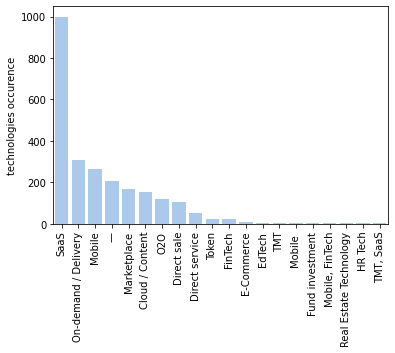

In [30]:
from collections import Counter
technologies= Counter(list(df.Technology))
technologies_df= pd.DataFrame.from_dict(technologies, orient='index',columns=['technologies occurence'])
technologies_df.drop(technologies_df[technologies_df['technologies occurence']<3].index, inplace=True)
technologies_df.drop(technologies_df[technologies_df.index==''].index, inplace=True)
sorted_df= technologies_df.sort_values('technologies occurence',ascending=False)[:20]
sns.set_color_codes("pastel")
sns.barplot(sorted_df.index, y='technologies occurence', data=sorted_df,
            label=sorted_df, color="b")
plt.xticks(rotation=90)
plt.show()

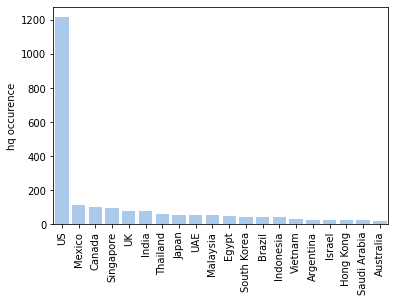

In [36]:
from collections import Counter
hq= Counter(list(df.HQ))
hq_df= pd.DataFrame.from_dict(hq, orient='index',columns=['hq occurence'])
hq_df.drop(hq_df[hq_df['hq occurence']<3].index, inplace=True)
hq_df.drop(hq_df[hq_df.index==''].index, inplace=True)
sorted_df= hq_df.sort_values('hq occurence',ascending=False)[:20]
sns.set_color_codes("pastel")
sns.barplot(sorted_df.index, y='hq occurence', data=sorted_df,
            label=sorted_df, color="b")
plt.xticks(rotation=90)
plt.show()

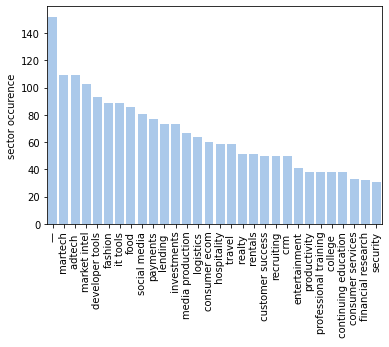

In [40]:
from collections import Counter

sectors_list= []
for bachla in list(df.Sector):
    #print(type(bachla))
    sectors_list= sectors_list  +bachla.lower().split('/')
sector= Counter(sectors_list)
sector_df= pd.DataFrame.from_dict(sector, orient='index',columns=['sector occurence'])
sector_df.drop(sector_df[sector_df['sector occurence']<3].index, inplace=True)
sector_df.drop(sector_df[sector_df.index==''].index, inplace=True)
sorted_df= sector_df.sort_values('sector occurence',ascending=False)[:30]
sns.set_color_codes("pastel")
sns.barplot(sorted_df.index, y='sector occurence', data=sorted_df,
            label=sorted_df, color="b")
plt.xticks(rotation=90)
plt.show()